In [64]:
# ===============================
# STEP 0: IMPORT LIBRARIES
# ===============================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [65]:
# ===============================
# STEP 1: LOAD DATASET
# ===============================
df = pd.read_csv("/content/NWMP_August2025_MPCB_0.csv", encoding='latin1')

In [66]:
print("Dataset Shape:", df.shape)
df


Dataset Shape: (222, 54)


,STN Code,Sampling Date,Month,Sampling Time,Stn Name,Type Water Body,Name Of Water Body,River Basin,District,State Name,...,Total Dissolved Solids,Total Fixed Solids,Total Suspended Solids,Phosphate,Boron,Potassium,Flouride,Remark,latitude,longitude
0,1312,08-05-2025,Aug,16:30:00,"Godavari river at Jaikwadi Dam, Village. Paith...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,497.0,448.0,10(BDL),0.78,0.58,2.88,0.5,NaN,19°29.263',75°22.272'
1,2158,08-05-2025,Aug,16:00:00,Godavari river at U/s of Paithan at Paithan in...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,489.0,441.0,11,0.71,0.61,3.14,0.41,NaN,19°30.887,75°22.457
2,2159,08-05-2025,Aug,17:15:00,Godavari river at D/s of Paithan at Pathegaon ...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,491.0,442.0,11,0.76,0.56,3.16,0.45,NaN,19°28.835,75°23.835
3,2160,08-05-2025,Aug,15:00:00,"Godavari river at U/s of Aurangabad Reservoir,...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,479.0,612.0,10(BDL),1.47,0.55,3.13,0.6,NaN,19°37.463,75°01.490
4,2161,08-04-2025,Aug,15:30:00,Godavari river at Jalna Intake water pump hous...,River,Godavari,Godavari,Jalna,Maharashtra,...,765.0,689.0,12,0.33,0.56,4.57,0.49,NaN,19°21.392,75°42.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,1911,08-07-2025,Aug,12:25:00,"Chandrabhaga river at U/s of Pandharpur town, ...",River,Chandrabhaga,Chandrabhaga,Solapur,Maharashtra,...,648.0,530.0,11,0.22,0.5(BDL),1.99,0.2(BDL),NaN,17°43.797',75°18.745'
218,1912,08-07-2025,Aug,11:30:00,Chandrabhaga river at D/s of Pandharpur town r...,River,Chandrabhaga,Chandrabhaga,Solapur,Maharashtra,...,624.0,510.0,16,0.93,0.5(BDL),1.16,0.7,NaN,17°40.086',75°20.839'
219,2705,08-08-2025,Aug,10:15:00,"Sina river near Laboti toll naka, Village. Lab...",River,Sina,Sina,Solapur,Maharashtra,...,448.0,361.0,70,0.32,1.1,1(BDL),0.4,NaN,17° 47.095,75° 42.577
220,2789,08-07-2025,Aug,13:35:00,"Nalla at D/s of Aklai Mandir, Village. Aklai, ...",Nala,Nira,Nira,Solapur,Maharashtra,...,465.0,374.0,24,0.73,0.5(BDL),4.45,0.3,NaN,17° 53.339,75° 01.541


**EDA**

In [67]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   STN Code                        222 non-null    int64  
 1   Sampling Date                   222 non-null    object 
 2   Month                           222 non-null    object 
 3   Sampling Time                   222 non-null    object 
 4   Stn Name                        222 non-null    object 
 5   Type Water Body                 222 non-null    object 
 6   Name Of Water Body              200 non-null    object 
 7   River Basin                     198 non-null    object 
 8   District                        222 non-null    object 
 9   State Name                      222 non-null    object 
 10  Mon Agency                      222 non-null    object 
 11  Frequency                       222 non-null    object 
 12  Major Polluting Sources         149 

In [68]:
# Missing values
df.isnull().sum().sort_values(ascending=False)

,0
Use of Water in Down Stream,222
Remark,215
Odor,170
Visibility Effluent Discharge,94
Major Polluting Sources,73
Fecal Streptococci,48
Boron,34
Temperature,29
River Basin,24
Name Of Water Body,22


In [69]:
# Statistical summary
df.describe()


,STN Code,Use of Water in Down Stream,Flow,Temperature,pH,Conductivity,BOD,COD,Amonia N,Hardness CaCo3,Calcium CaCo3,Magnesium CaCo3,Total Dissolved Solids,Total Fixed Solids
count,222.000000,0.0,215.000000,193.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2615.716216,NaN,0.326512,25.963731,7.900465,4601.869767,9.106512,43.056279,1.051628,597.605581,149.728372,447.691116,3651.939535,3217.614884
std,1274.980701,NaN,1.058607,3.006717,0.438721,11045.712262,17.544468,67.590407,1.960582,1295.815299,217.426974,1084.977965,8778.601406,7763.467270
min,11.000000,NaN,0.000000,18.000000,6.900000,45.000000,1.800000,8.000000,0.400000,16.000000,8.000000,8.000000,36.000000,30.000000
25%,2162.250000,NaN,0.000000,24.000000,7.600000,224.000000,3.200000,12.000000,0.400000,70.000000,40.000000,32.000000,173.000000,151.000000
50%,2668.500000,NaN,0.000000,27.000000,7.900000,421.000000,4.200000,20.000000,0.400000,130.000000,66.000000,60.000000,316.000000,265.000000
75%,2767.250000,NaN,0.000000,28.000000,8.200000,820.000000,8.600000,34.050000,0.690000,235.700000,130.400000,105.000000,526.000000,454.000000
max,5997.000000,NaN,8.000000,31.000000,9.700000,74240.000000,210.000000,624.000000,16.920000,7390.000000,1160.000000,6230.000000,38400.000000,34560.000000


Target Distribution

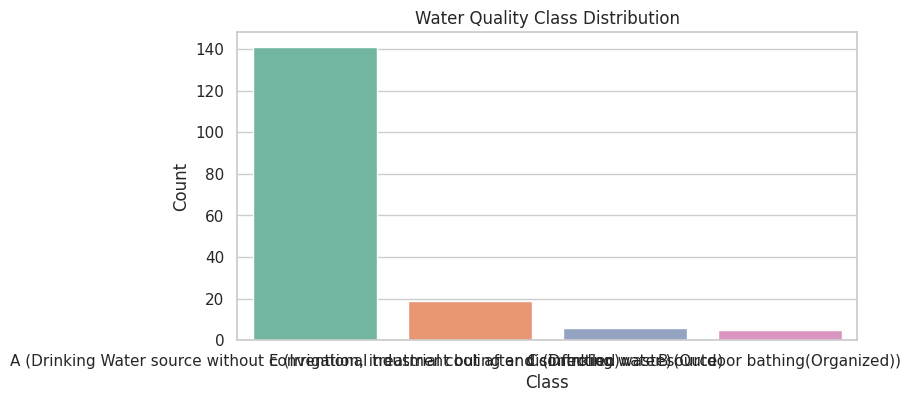

In [116]:
plt.figure(figsize=(8,4))
sns.countplot(x=y, palette="Set2")
plt.title("Water Quality Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Histograms for Features

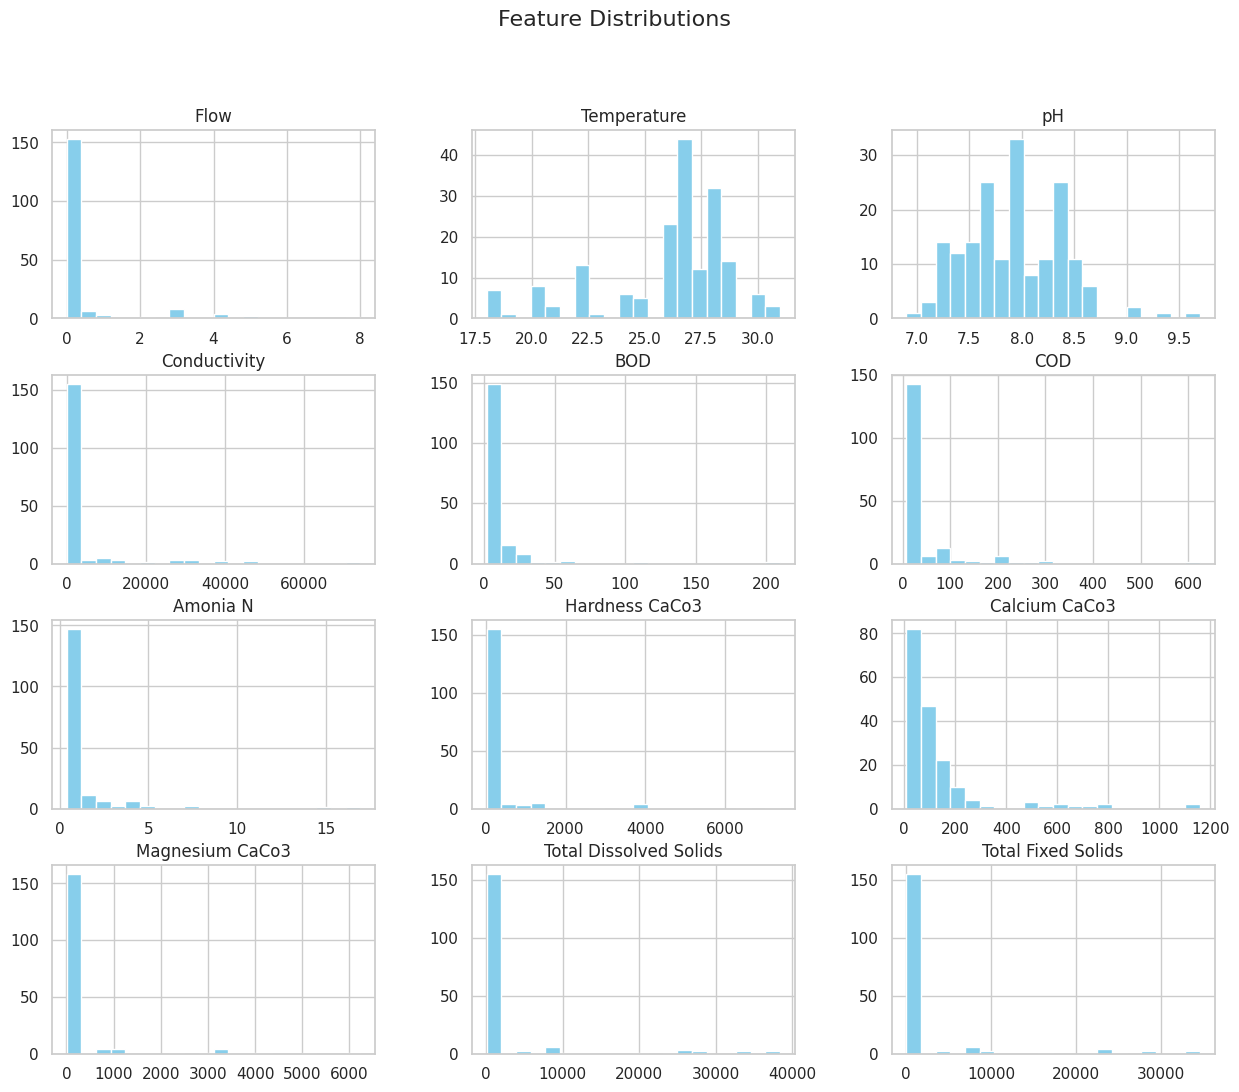

In [94]:
# Plot histograms for all numeric features
X.hist(bins=20, figsize=(15,12), color='skyblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


Boxplots to Detect Outliers

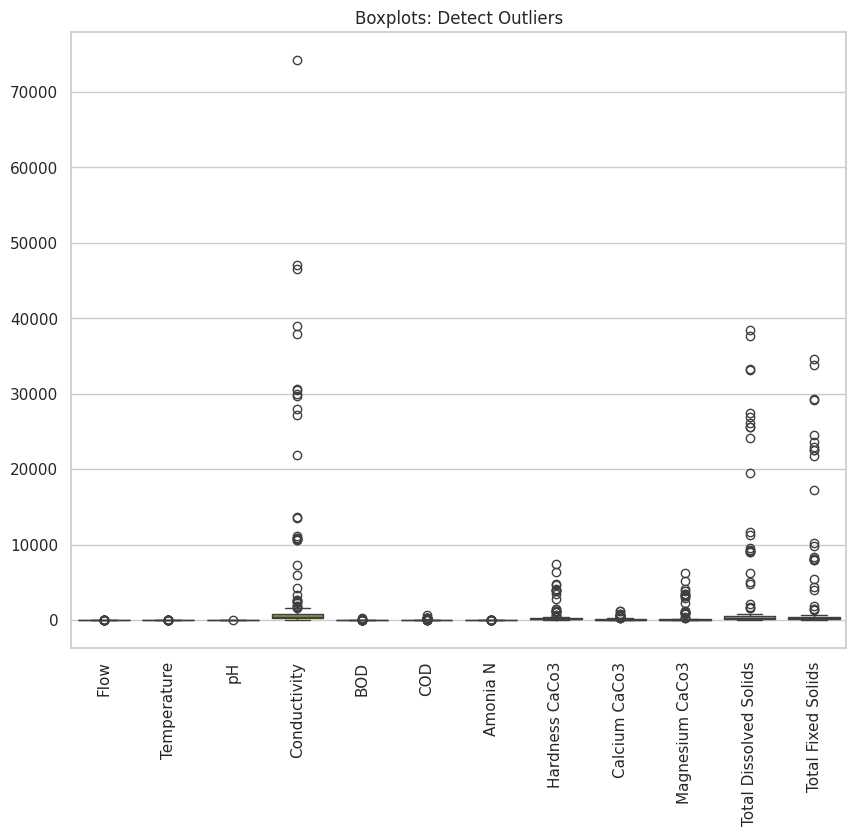

In [100]:
plt.figure(figsize=(10,8))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Boxplots: Detect Outliers")
plt.show()


Correlation Heatmap

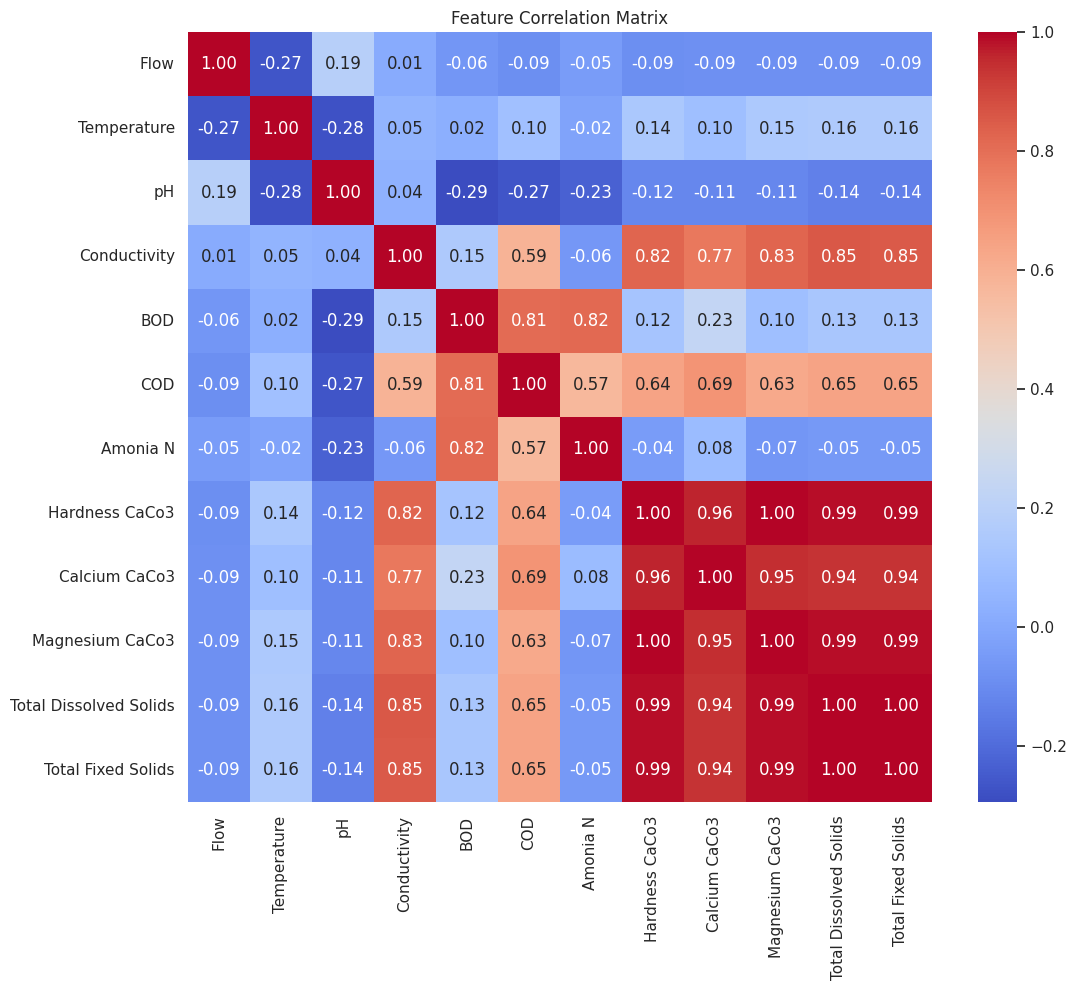

In [96]:
plt.figure(figsize=(12,10))
corr = X.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()


Pairplot for Selected Features

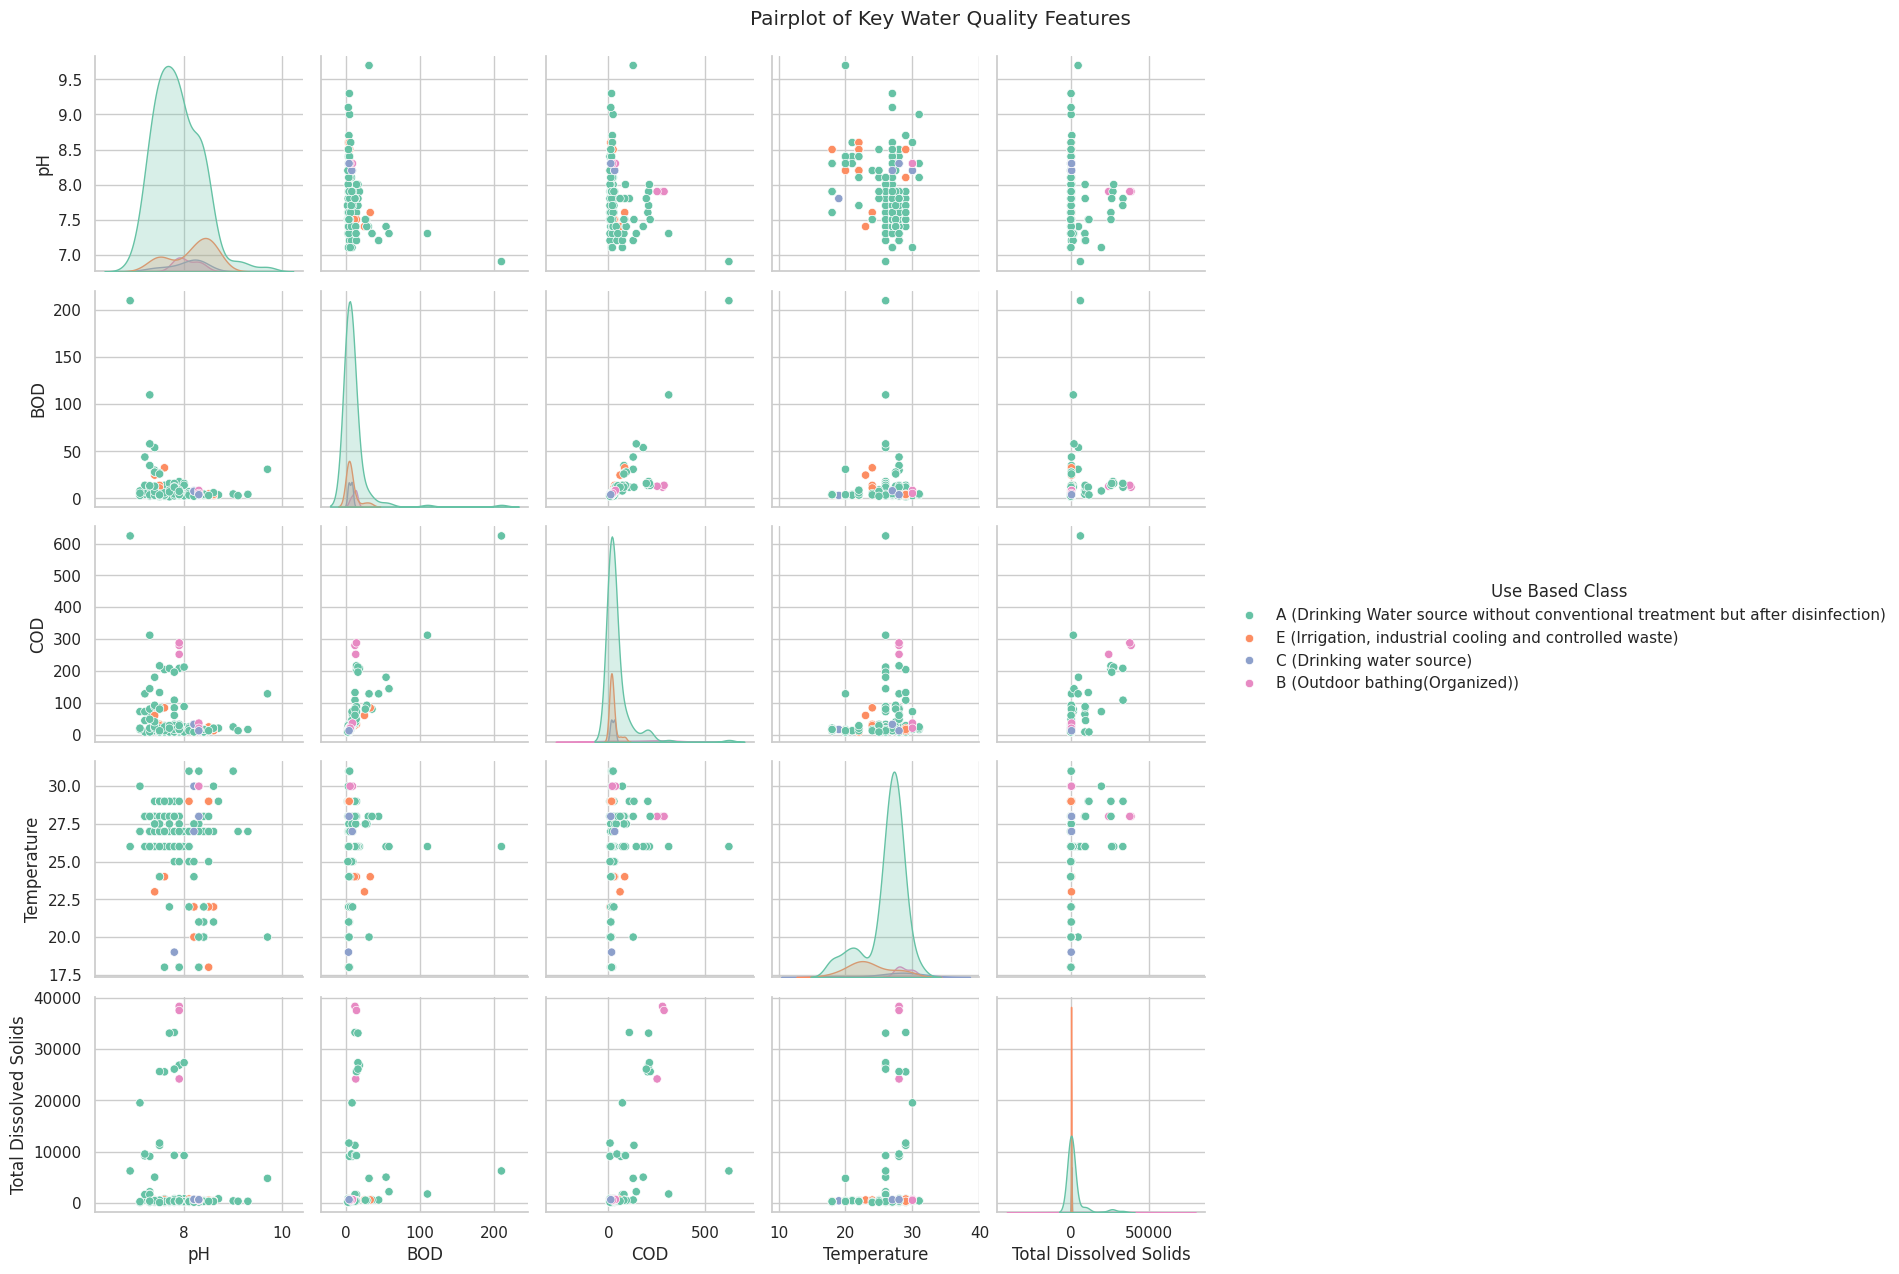

In [99]:
selected_features = ["pH","BOD","COD","Temperature","Total Dissolved Solids"]
df_selected = X[selected_features]
df_selected['Use Based Class'] = y.values

sns.pairplot(df_selected, hue="Use Based Class", palette="Set2")
plt.suptitle("Pairplot of Key Water Quality Features", y=1.02)
plt.show()

Target Variable Analysis

In [70]:
# Check unique classes
df['Use Based Class'].value_counts()


,count
Use Based Class,
A (Drinking Water source without conventional treatment but after disinfection),141
No Information,44
"E (Irrigation, industrial cooling and controlled waste)",19
C (Drinking water source),6
B (Outdoor bathing(Organized)),5


Feature Selection

In [72]:
# =========================
# 5. FEATURE SELECTION
# =========================

drop_cols = [
    "State Name", "District", "STN Code", "Sampling Date",
    "Frequency", "Mon Agency", "Month", "Sampling Time",
    "Stn Name", "Type Water Body", "River Basin",
    "Name Of Water Body", "Major Polluting Sources",
    "Use of Water in Down Stream", "Remark"
]

df = df.drop(columns=drop_cols, errors="ignore")


Seperate features and Target

In [73]:
# Remove rows with undefined target class
df = df[df["Use Based Class"] != "No Information"]

print(df["Use Based Class"].value_counts())


Use Based Class
A (Drinking Water source without conventional treatment but after disinfection)    141
E (Irrigation, industrial cooling and controlled waste)                             19
C (Drinking water source)                                                            6
B (Outdoor bathing(Organized))                                                       5
Name: count, dtype: int64


In [74]:
#  X & y SPLIT

X = df.drop("Use Based Class", axis=1)
y = df["Use Based Class"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (178, 39)
y shape: (178,)


In [75]:
# Drop columns which are entirely NaN
X = X.dropna(axis=1, how="all")

print("Remaining columns:", X.shape[1])


Remaining columns: 38


In [78]:
from sklearn.impute import SimpleImputer

# Identify and drop non-numeric columns before imputation
# The imputer requires all input features to be numeric.
non_numeric_cols = X.select_dtypes(include=['object']).columns

if len(non_numeric_cols) > 0:
    print(f"Dropping non-numeric columns before imputation: {list(non_numeric_cols)}")
    X = X.drop(columns=non_numeric_cols)

imputer = SimpleImputer(strategy="median")

X = pd.DataFrame(
    imputer.fit_transform(X),
    columns=X.columns,
    index=X.index
)

Dropping non-numeric columns before imputation: [' Visibility Effluent Discharge', 'Weather', 'Approx Depth', 'Human Activities', 'Floating Matter', 'Color', 'Odor', 'Dissolved O2', 'Nitrate N', 'Fecal Coliform', 'Total Coliform', 'Fecal Streptococci', 'Turbidity', 'Phenophelene Alkanity', 'Total Alkalinity', 'Chlorides', 'Total Kjeldahl N', 'Sulphate', 'Sodium', 'Total Suspended Solids', 'Phosphate', 'Boron', 'Potassium', 'Flouride', 'latitude', 'longitude']


In [79]:
X.isna().sum().sum()


np.int64(0)

In [80]:
# 8. LABEL ENCODING

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Class Mapping:")
for i, cls in enumerate(le.classes_):
    print(i, "->", cls)


Class Mapping:
0 -> A (Drinking Water source without conventional treatment but after disinfection)
1 -> B (Outdoor bathing(Organized))
2 -> C (Drinking water source)
3 -> E (Irrigation, industrial cooling and controlled waste)
4 -> nan


In [81]:
# 9. TRAIN TEST SPLIT


X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [82]:
# 10. FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model 1 – Logistic Regression

In [83]:
# 11. LOGISTIC REGRESSION

lr = LogisticRegression(max_iter=1000, multi_class="ovr")
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


Evaluation

In [84]:
import numpy as np

# Convert le.classes_ to a list of strings, handling potential NaN values
display_target_names = [str(cls) if not isinstance(cls, float) or not np.isnan(cls) else 'Missing/NaN' for cls in le.classes_]

print("LOGISTIC REGRESSION REPORT")
print(classification_report(y_test, y_pred_lr, target_names=display_target_names))

LOGISTIC REGRESSION REPORT
                                                                                 precision    recall  f1-score   support

A (Drinking Water source without conventional treatment but after disinfection)       0.81      1.00      0.89        29
                                                 B (Outdoor bathing(Organized))       0.00      0.00      0.00         1
                                                      C (Drinking water source)       0.00      0.00      0.00         1
                        E (Irrigation, industrial cooling and controlled waste)       0.00      0.00      0.00         4
                                                                    Missing/NaN       0.00      0.00      0.00         1

                                                                       accuracy                           0.81        36
                                                                      macro avg       0.16      0.20      0.18        36
   

Model 2 – Random Forest

In [85]:
# =========================
# 12. RANDOM FOREST
# =========================

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


Evaluation

In [86]:
print("RANDOM FOREST REPORT")
print(classification_report(y_test, y_pred_rf, target_names=display_target_names))

RANDOM FOREST REPORT
                                                                                 precision    recall  f1-score   support

A (Drinking Water source without conventional treatment but after disinfection)       0.85      1.00      0.92        29
                                                 B (Outdoor bathing(Organized))       0.00      0.00      0.00         1
                                                      C (Drinking water source)       0.00      0.00      0.00         1
                        E (Irrigation, industrial cooling and controlled waste)       1.00      0.25      0.40         4
                                                                    Missing/NaN       1.00      1.00      1.00         1

                                                                       accuracy                           0.86        36
                                                                      macro avg       0.57      0.45      0.46        36
         

Confusion Matrix

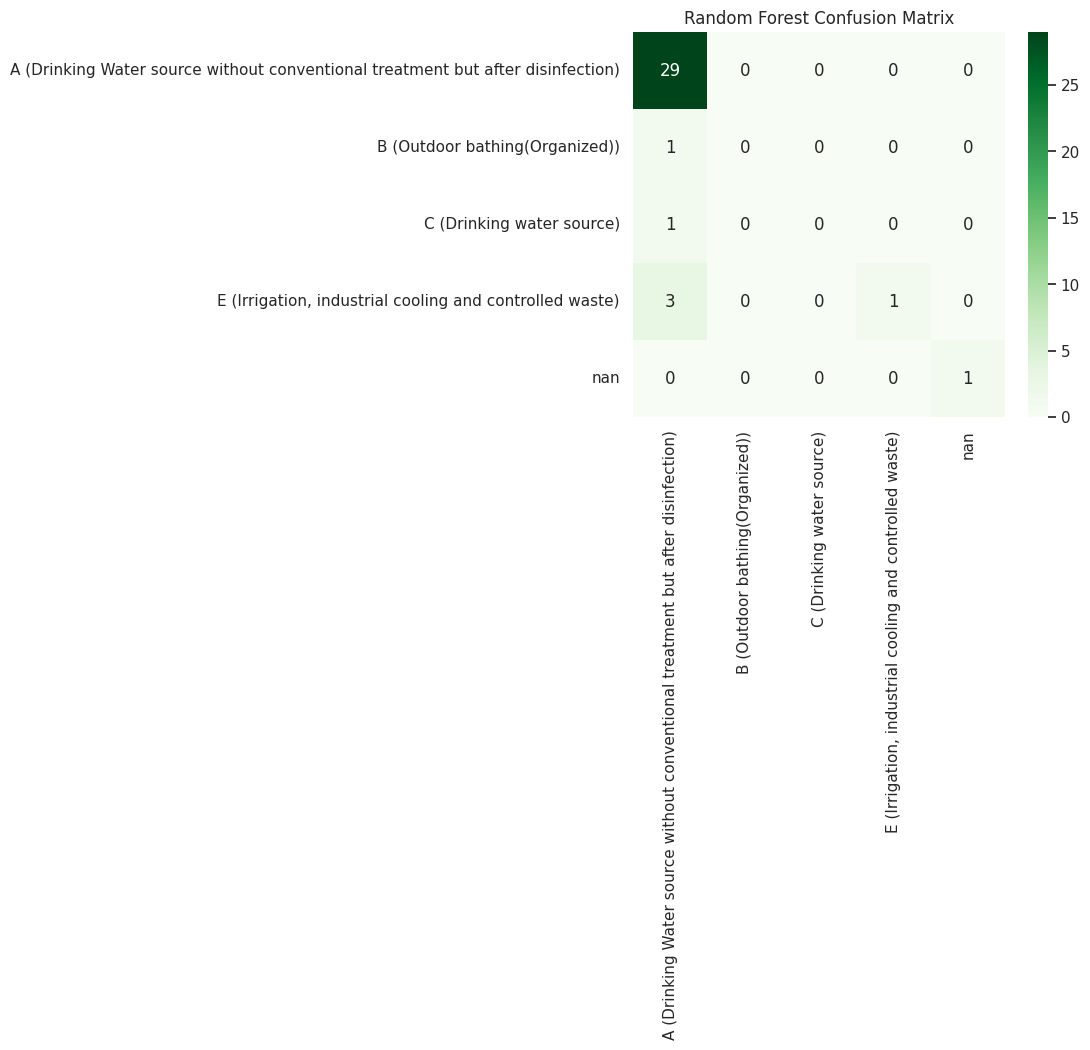

In [87]:
# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Random Forest Confusion Matrix")
plt.show()


Feature Importance

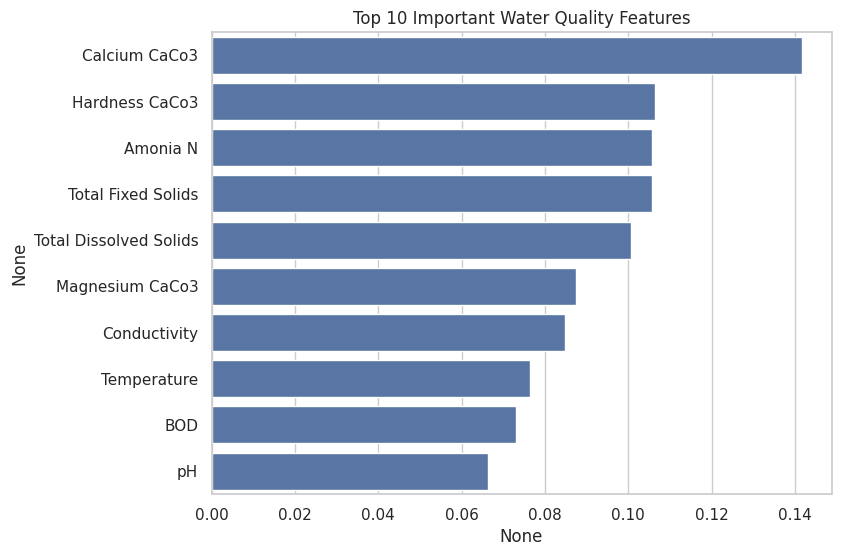

In [88]:
# 13. FEATURE IMPORTANCE

importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Water Quality Features")
plt.show()


In [90]:
# Create comparison dataframe
results_df = pd.DataFrame({
    "Actual_Class": le.inverse_transform(y_test),
    "Predicted_Class": le.inverse_transform(y_pred_rf)  # or y_pred_lr
})

results_df


,Actual_Class,Predicted_Class
0,A (Drinking Water source without conventional ...,A (Drinking Water source without conventional ...
1,"E (Irrigation, industrial cooling and controll...","E (Irrigation, industrial cooling and controll..."
2,C (Drinking water source),A (Drinking Water source without conventional ...
3,A (Drinking Water source without conventional ...,A (Drinking Water source without conventional ...
4,A (Drinking Water source without conventional ...,A (Drinking Water source without conventional ...
5,"E (Irrigation, industrial cooling and controll...",A (Drinking Water source without conventional ...
6,A (Drinking Water source without conventional ...,A (Drinking Water source without conventional ...
7,A (Drinking Water source without conventional ...,A (Drinking Water source without conventional ...
8,A (Drinking Water source without conventional ...,A (Drinking Water source without conventional ...
9,"E (Irrigation, industrial cooling and controll...",A (Drinking Water source without conventional ...


In [91]:
total_test = len(y_test)
correct = (y_test == y_pred_rf).sum()

print("Total test samples:", total_test)
print("Correct predictions:", correct)
print("Accuracy:", correct / total_test)


Total test samples: 36
Correct predictions: 31
Accuracy: 0.8611111111111112


Check Class Distribution

In [101]:
print(y.value_counts())


Use Based Class
A (Drinking Water source without conventional treatment but after disinfection)    141
E (Irrigation, industrial cooling and controlled waste)                             19
C (Drinking water source)                                                            6
B (Outdoor bathing(Organized))                                                       5
Name: count, dtype: int64


Import SMOTE to handle imbalance

In [105]:
from imblearn.over_sampling import SMOTE

In [108]:
# ===============================
# STEP 11 ONWARDS: HANDLE CLASS IMBALANCE
# ===============================
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampling to balance classes
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train_scaled, y_train)

# Check class distribution
import numpy as np
print("Original class distribution:", np.bincount(y_train))
print("Resampled class distribution:", np.bincount(y_train_res))


Original class distribution: [112   4   5  15   6]
Resampled class distribution: [112 112 112 112 112]


RETRAIN MODELS ON BALANCED DATA

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000, multi_class="ovr")
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)


EVALUATE MODELS

=== LOGISTIC REGRESSION REPORT ===
                                                                                 precision    recall  f1-score   support

A (Drinking Water source without conventional treatment but after disinfection)       1.00      0.31      0.47        29
                                                 B (Outdoor bathing(Organized))       1.00      1.00      1.00         1
                                                      C (Drinking water source)       0.00      0.00      0.00         1
                        E (Irrigation, industrial cooling and controlled waste)       0.57      1.00      0.73         4
                                                                            nan       0.08      1.00      0.14         1

                                                                       accuracy                           0.42        36
                                                                      macro avg       0.53      0.66      0.47      

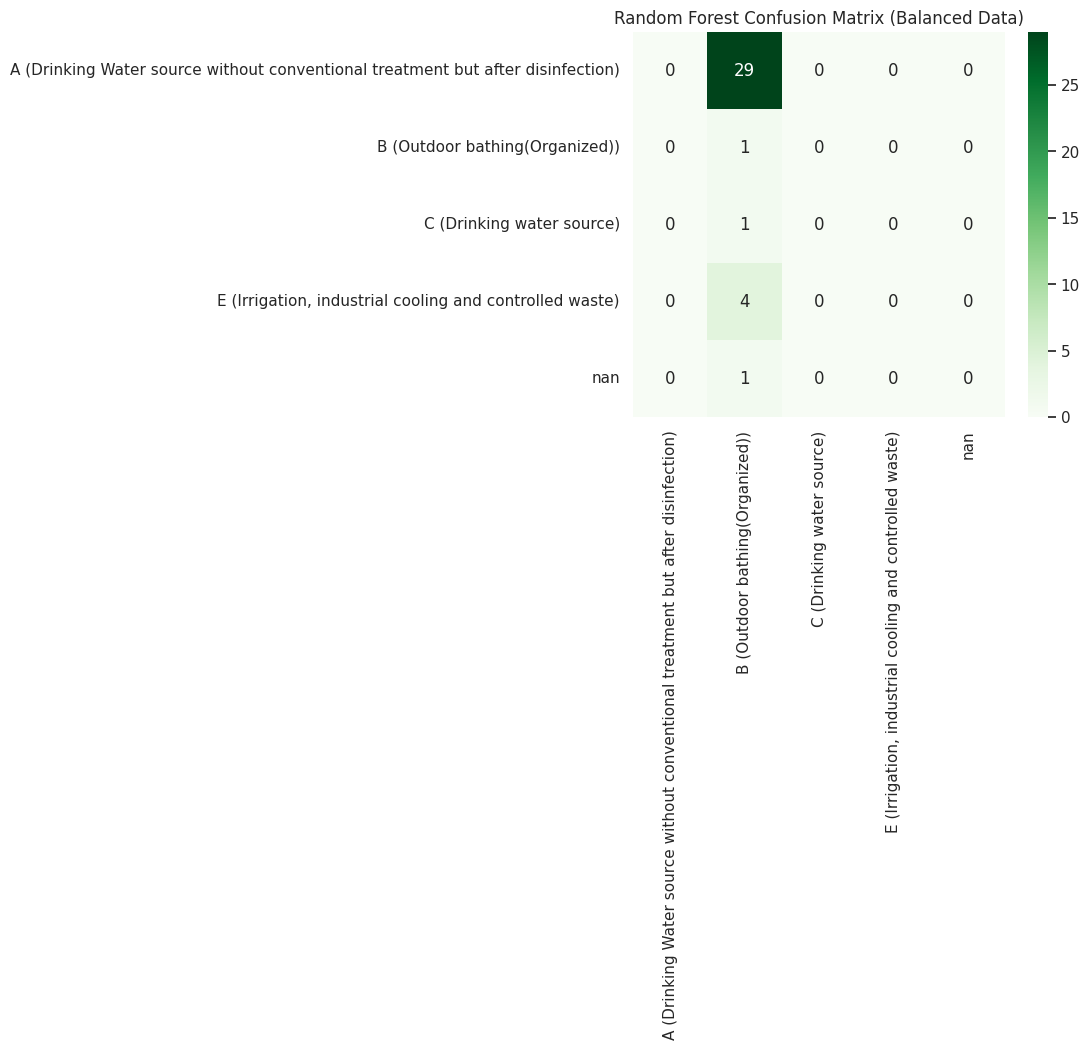

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare class names for display
display_target_names = [str(cls) for cls in le.classes_]

# Logistic Regression Report
print("=== LOGISTIC REGRESSION REPORT ===")
print(classification_report(y_test, y_pred_lr, target_names=display_target_names))

# Random Forest Report
print("=== RANDOM FOREST REPORT ===")
print(classification_report(y_test, y_pred_rf, target_names=display_target_names))

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Random Forest Confusion Matrix (Balanced Data)")
plt.show()


FEATURE IMPORTANCE (Random Forest)

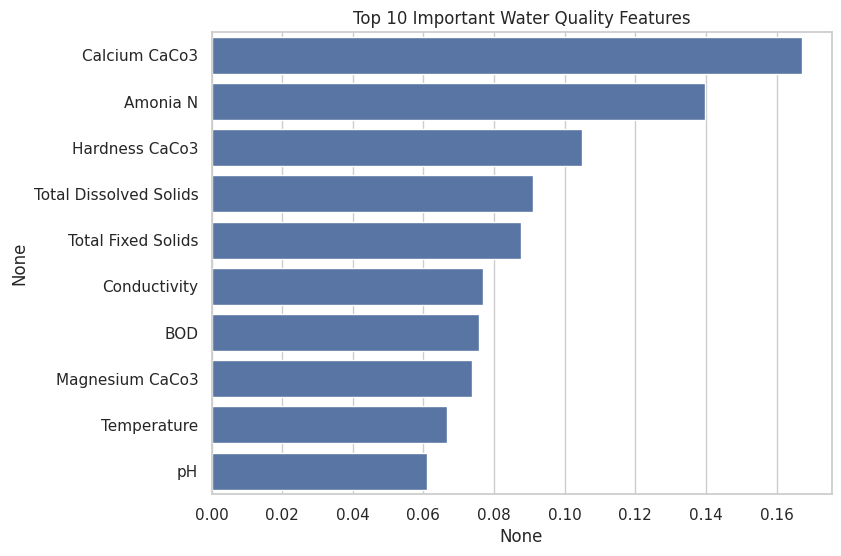

In [111]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Water Quality Features")
plt.show()


Results Dataframe

In [112]:
# Create dataframe to compare actual vs predicted
results_df = pd.DataFrame({
    "Actual_Class": le.inverse_transform(y_test),
    "Predicted_Class_RF": le.inverse_transform(y_pred_rf),
    "Predicted_Class_LR": le.inverse_transform(y_pred_lr)
})

results_df.head(20)  # Display first 20 rows


,Actual_Class,Predicted_Class_RF,Predicted_Class_LR
0,A (Drinking Water source without conventional ...,B (Outdoor bathing(Organized)),C (Drinking water source)
1,"E (Irrigation, industrial cooling and controll...",B (Outdoor bathing(Organized)),"E (Irrigation, industrial cooling and controll..."
2,C (Drinking water source),B (Outdoor bathing(Organized)),"E (Irrigation, industrial cooling and controll..."
3,A (Drinking Water source without conventional ...,B (Outdoor bathing(Organized)),NaN
4,A (Drinking Water source without conventional ...,B (Outdoor bathing(Organized)),A (Drinking Water source without conventional ...
5,"E (Irrigation, industrial cooling and controll...",B (Outdoor bathing(Organized)),"E (Irrigation, industrial cooling and controll..."
6,A (Drinking Water source without conventional ...,B (Outdoor bathing(Organized)),NaN
7,A (Drinking Water source without conventional ...,B (Outdoor bathing(Organized)),NaN
8,A (Drinking Water source without conventional ...,B (Outdoor bathing(Organized)),C (Drinking water source)
9,"E (Irrigation, industrial cooling and controll...",B (Outdoor bathing(Organized)),"E (Irrigation, industrial cooling and controll..."


Accuracy Summary

In [113]:
# Calculate accuracies
accuracy_rf = (y_test == y_pred_rf).sum() / len(y_test)
accuracy_lr = (y_test == y_pred_lr).sum() / len(y_test)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")


Random Forest Accuracy: 0.03
Logistic Regression Accuracy: 0.42
